<a href="https://colab.research.google.com/github/LiibanMo/LinearModels/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from abc import ABC, abstractmethod
from typing import Self
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [69]:
class kNN_Model(ABC):
    @abstractmethod
    def fit(self, X:np.ndarray, y:np.ndarray) -> Self:
        pass

    @abstractmethod
    def predict(self, X:np.ndarray) -> np.ndarray:
        pass

In [70]:
class kNeighboursRegressor(kNN_Model):
    def __init__(self, k:int=3):
        self.k = k

    def fit(self, X:np.ndarray, y:np.ndarray) -> Self:
        self._X = X.astype(np.float32)
        self._y = y.astype(np.float32)
        return self

    def predict(self, X:np.ndarray) -> np.ndarray:
        if X.shape[1] != self._X.shape[1]:
            raise ValueError(f"Number of features of test data ({X.shape[1]}) should be equal to features in training data ({self._X.shape[1]}).")

        y_pred = np.zeros(X.shape[0])

        for idx, x in enumerate(X):
            l2_dists = np.linalg.norm(x - self._X, axis=1)
            new_permutation = np.argsort(l2_dists)
            ordered_dists = np.sort(l2_dists)
            ordered_observations = self._y[new_permutation[:self.k]]
            y_pred[idx] = ordered_observations.sum() / self.k

        return y_pred

In [71]:
class kNeighboursClassifier(kNN_Model):
    def __init__(self, k:int=3):
        self.k = k

    def fit(self, X:np.ndarray, y:np.ndarray) -> Self:
        self._X = X
        self._y = y

    def predict(self, X:np.ndarray) -> np.ndarray:
        if X.shape[1] != self._X.shape[1]:
            raise ValueError(f"Number of features of test data ({X.shape[1]}) should be equal to features in training data ({self._X.shape[1]}).")

        y_pred = np.zeros(X.shape[0])

        def np_mode(array:np.ndarray) -> np.ndarray:
            # FINISH
            pass

        for idx, x in enumerate(X):
            l2_dists = np.linalg.norm(x - self._X)
            new_permutation = np.argsort(l2_dists)
            ordered_dists = np.sort(l2_dists)
            ordered_observations = self._y[new_permutation[:self.k]]
            y_pred[idx] = None # FINISH

        return y_pred

In [72]:
np.random.seed(12)
TOTAL = 100
FEATURES = 1
TEST_SIZE = int(0.2 * TOTAL)
RANDOM_STATE = 123

X = np.linspace(0, 10, TOTAL*FEATURES).reshape(TOTAL, FEATURES)
y = X**2 + 4 * X + 3 + 10 * np.random.normal(0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)

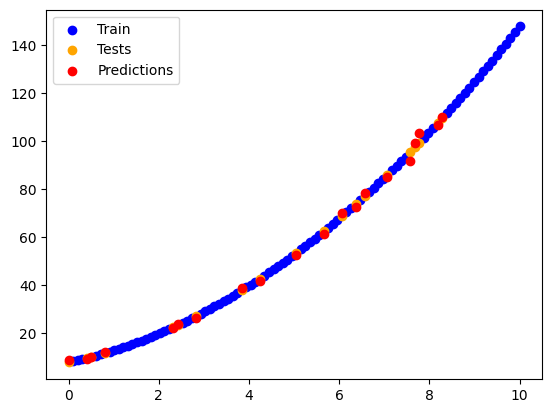

In [73]:
model = kNeighboursRegressor()
fitted_model = model.fit(X_train, y_train)
y_pred = fitted_model.predict(X_test)

plt.scatter(X_train, y_train, c="blue", label="Train")
plt.scatter(X_test, y_test, c="orange", label="Tests")
plt.scatter(X_test, y_pred, c="red", label="Predictions")
plt.legend()
plt.show()